In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
path = '/content/drive/My Drive/PROJECT/processed_data_2.csv'

In [4]:
import tensorflow as tf
dn = tf.test.gpu_device_name()
if dn != '/device:GPU:0':
  raise SystemError ('gpu not found')
print('gpu found ar : {}'.format(dn))

gpu found ar : /device:GPU:0


In [5]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from tabulate import tabulate
import random

%matplotlib inline

In [8]:
new_data = pd.read_csv(path) #load data

In [ ]:
new_data.head()

,Unnamed: 0,UserId,IsCorrect,CorrectAnswer,AnswerValue,Gender,PremiumPupil,HourAnswered,MonthAnswered,YearAnswered,...,Year_Month_int,l_QuestionId,l_AnswerId,l_GroupId,l_QiuzId,l_SchemeOfWorkId,poly1_0,poly1_1,poly1_2,Perfect_Correct
0,0,65967.0,0.0,4.0,2.0,1.0,0.0,13.0,4.0,2019.0,...,0.0,9.740792,16.337489,8.522380,9.641538,9.036939,0.0,4.0,0.0,4.0
1,1,50013.0,0.0,3.0,1.0,1.0,1.0,18.0,11.0,2018.0,...,1.0,9.674766,16.425492,8.512181,9.754175,10.248070,0.0,3.0,0.0,3.0
2,2,87935.0,1.0,4.0,4.0,1.0,1.0,22.0,5.0,2019.0,...,2.0,9.978966,16.677026,8.296547,8.607948,10.248070,1.0,4.0,4.0,5.0
3,3,77530.0,0.0,2.0,3.0,1.0,1.0,21.0,11.0,2018.0,...,1.0,9.677966,16.252204,9.006141,9.216521,9.037533,0.0,2.0,0.0,2.0
4,4,99529.0,0.0,3.0,4.0,2.0,0.0,21.0,12.0,2018.0,...,3.0,9.934986,16.318109,8.115521,6.369901,9.038959,0.0,3.0,0.0,3.0


In [9]:
new_data.drop('Unnamed: 0', axis = 1, inplace= True) # This unnamed 0 column was created when saving the prerocessed data csv file so we need to remove it

Selecting 100k i.e 24% of the data sets

```

```



In [10]:
def frac(dataframe, fraction, other_info=None):
  """Returns Fractions of the Data"""
  return dataframe.sample(frac = fraction)

In [11]:
random.seed(1000)
df = frac(new_data, 0.02392) # Taking 1000k rows of the datasets 

In [12]:
df.shape

(100032, 34)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100032 entries, 2063879 to 4120106
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   UserId                100032 non-null  float64
 1   IsCorrect             100032 non-null  float64
 2   CorrectAnswer         100032 non-null  float64
 3   AnswerValue           100032 non-null  float64
 4   Gender                100032 non-null  float64
 5   PremiumPupil          100032 non-null  float64
 6   HourAnswered          100032 non-null  float64
 7   MonthAnswered         100032 non-null  float64
 8   YearAnswered          100032 non-null  float64
 9   Day of Week Answered  100032 non-null  float64
 10  YearBirth             100032 non-null  float64
 11  Age                   100032 non-null  float64
 12  poly2_0               100032 non-null  float64
 13  poly2_1               100032 non-null  float64
 14  poly2_2               100032 non-null  float6

In [13]:
df['AnswerValue'].value_counts()

2.0    26199
3.0    26021
1.0    24430
4.0    23382
Name: AnswerValue, dtype: int64

# Splitting Datasets And Performing Standard Scaler

In [15]:
X = df.drop(['UserId','AnswerValue'],axis=1)
y = df['AnswerValue']

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
#normalization of my features 
x_scaled= scaler.fit_transform(X)
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.45, random_state = 10)

 ## MODELLING

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, f1_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,f1_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

# from sklearn.grid_search import GridSearchCV

NB_mod = GaussianNB() #for continuous or numerical features.
NB_mod = BernoulliNB() #for features with binary values
dt= DecisionTreeClassifier()
# logreg = LogisticRegression()

# LINEAR SVM

SVM is unable to classify several classes. Our target is a multiclass problem, thus in order to utilize SVM, we must divide the target into numerous binary classification cases. To accomplish this, there are various ways; among them, I used a one-vs-rest classifier in conjunction with SVM.

In [ ]:
Classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability = True, random_state=1000))

In [ ]:
classifier = Classifier.fit(X_train, y_train)

In [ ]:
#predicting X_test
y_pred_lin = classifier.predict(X_test)

In [ ]:
# printing model probabilities so as to help us plot the auc and as well see our model performances
probs = classifier.predict_proba(X_test)
print(probs[:5,:])

[[6.63262667e-01 1.72841597e-01 1.63895670e-01 6.63262776e-08]
 [2.48698164e-04 4.84874800e-01 5.14876319e-01 1.82546871e-07]
 [6.45173530e-08 1.70168317e-01 1.84658200e-01 6.45173418e-01]
 [2.50358159e-04 4.89852589e-01 5.09896869e-01 1.83905461e-07]
 [6.58018260e-01 1.75217296e-01 1.66764378e-01 6.58018368e-08]]


In [ ]:
# Printing The Metric
print(accuracy_score(y_test, y_pred_lin))
print('Total accuracy: %.5f' % accuracy_score(y_test, y_pred_lin))
print(classification_report(y_test, y_pred_lin))
print(confusion_matrix(y_test, y_pred_lin))

0.747528601577252
Total accuracy: 0.74753
              precision    recall  f1-score   support

         1.0       0.94      1.00      0.97     10916
         2.0       0.57      0.55      0.56     11809
         3.0       0.56      0.50      0.53     11954
         4.0       0.90      1.00      0.95     10336

    accuracy                           0.75     45015
   macro avg       0.74      0.76      0.75     45015
weighted avg       0.73      0.75      0.74     45015

[[10916     0     0     0]
 [  701  6443  4665     0]
 [    0  4877  5955  1122]
 [    0     0     0 10336]]


In [ ]:
def print_metrics_4(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4')
    print('AnswerValue 1    %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2]+ '             %5d' % conf[0,3])
    print('AnswerValue 2    %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2]+ '             %5d' % conf[1,3])
    print('AnswerValue 3    %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2]+ '             %5d' % conf[2,3])
    print('AnswerValue 4    %6d' % conf[3,0] + '            %5d' % conf[3,1] + '             %5d' % conf[3,2]+ '             %5d' % conf[3,3])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores, average='micro'))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,:], multi_class='ovr'))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))

    print(' ')
    print('         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4')
    print('Num case   %0.2f' % metrics[3][0] + '         %0.2f' % metrics[3][1] + '         %0.2f' % metrics[3][2]+ '        %0.2f' % metrics[3][3])
    print('Precision   %0.2f' % metrics[0][0] + '          %0.2f' % metrics[0][1] + '            %0.2f' % metrics[0][2]+ '        %0.2f' % metrics[0][3])
    print('Recall      %0.2f' % metrics[1][0] + '          %0.2f' % metrics[1][1] + '            %0.2f' % metrics[1][2]+ '        %0.2f' % metrics[1][3])
    print('F1          %0.2f' % metrics[2][0] + '          %0.2f' % metrics[2][1] + '            %0.2f' % metrics[2][2]+ '        %0.2f' % metrics[2][3])
    
print_metrics_4(y_test, y_pred_lin)   

                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1     10916                0                 0                 0
AnswerValue 2       701             6443              4665                 0
AnswerValue 3         0             4877              5955              1122
AnswerValue 4         0                0                 0             10336

Accuracy        0.75
F1 Score        0.75
AUC             0.92
Macro precision 0.75
Macro recall    0.77
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   10916.00         11809.00         11954.00        10336.00
Precision   0.94          0.57            0.56        0.90
Recall      1.00          0.55            0.50        1.00
F1          0.97          0.56            0.53        0.95


In [ ]:
# This absolutely gave a fairly good performance with an accuracy of 75% and AUC close to 1. This performed much more better than Svm with rbf and poly kernel  

# RBF KERNEL SVM USING FEATURE SELECTION and HYPERPARAMETER

### FEATURE IMPORTANCE USING CORRELATION

In [ ]:
# SVM WITH FEATURE SELECTION USING CORRELATION 
correlations = df.corr().unstack().sort_values(ascending=False) # Build correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Convert to dataframe
correlations.columns = ['col1', 'col2', 'correlation'] # Label it
correlations.query("col1 == 'AnswerValue' & col2 != 'AnsweValue'") # Filter by variable
# output of this code will give correlation of column v2 with all the other columns

,col1,col2,correlation
18,AnswerValue,AnswerValue,1.000000
101,AnswerValue,poly1_1,0.423121
103,AnswerValue,CorrectAnswer,0.423121
104,AnswerValue,poly1_2,0.415551
118,AnswerValue,Perfect_Correct,0.386805
371,AnswerValue,Gender,0.013293
438,AnswerValue,YearBirth,0.007898
475,AnswerValue,l_GroupId,0.005034
503,AnswerValue,l_QuestionId,0.004170
541,AnswerValue,l_QiuzId,0.003141


MOST CORRELATED FEATURES (FEATURE SELECTION) with the Target Variable (AnswerValue)

In [ ]:
new_fea = df[['poly1_1','CorrectAnswer','poly1_2','Perfect_Correct','Gender','l_QuestionId', 'YearBirth','Age_std_on_yr_mth','Age_min_on_yr_mth','l_QiuzId','Year_Month_int',
              'poly2_1','MonthAnswered','l_AnswerId','poly2_5','poly2_3']]
              # ,'Age_min_on_yr_mth']]
              

In [ ]:
x_new= scaler.fit_transform(new_fea)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 10)

In [ ]:
# nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [0.1, 0.5]}
## Define the SVM model
svc_clf = svm.SVC(kernel='rbf') 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = svc_clf, param_grid = param_grid, 
                      scoring = 'accuracy',
                      return_train_score = True)
clf.fit(x_new, y)
print(clf.best_estimator_.C)
# print(clf.best_estimator_.gamma

0.5


In [ ]:
random.seed(1115)
Classifier = OneVsRestClassifier(svm.SVC(kernel='rbf',C = clf.best_estimator_.C,
                                         probability=True, random_state=1000))

In [ ]:
classifier = Classifier.fit(X_train, y_train)

In [ ]:
#predicting X_test
y_pred_rbf = classifier.predict(X_test)

In [ ]:
#printing probability
probs = classifier.predict_proba(X_test)
print(probs[:5,:])

[[2.47616200e-01 2.10354643e-01 2.60787605e-01 2.81241553e-01]
 [9.69661881e-08 9.69661881e-08 3.03380218e-02 9.69661784e-01]
 [9.17116715e-02 2.05511984e-01 3.03320413e-01 3.99455931e-01]
 [1.27068201e-01 2.76419286e-01 2.65360002e-01 3.31152511e-01]
 [2.81158260e-01 3.10449005e-01 2.08739658e-01 1.99653077e-01]]


In [ ]:
#printing model metrics
def print_metrics_4(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4')
    print('AnswerValue 1    %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2]+ '             %5d' % conf[0,3])
    print('AnswerValue 2    %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2]+ '             %5d' % conf[1,3])
    print('AnswerValue 3    %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2]+ '             %5d' % conf[2,3])
    print('AnswerValue 4    %6d' % conf[3,0] + '            %5d' % conf[3,1] + '             %5d' % conf[3,2]+ '             %5d' % conf[3,3])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores, average='macro'))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,:], multi_class='ovr'))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4')
    print('Num case   %0.2f' % metrics[3][0] + '         %0.2f' % metrics[3][1] + '         %0.2f' % metrics[3][2]+ '        %0.2f' % metrics[3][3])
    print('Precision   %0.2f' % metrics[0][0] + '          %0.2f' % metrics[0][1] + '            %0.2f' % metrics[0][2]+ '        %0.2f' % metrics[0][3])
    print('Recall      %0.2f' % metrics[1][0] + '          %0.2f' % metrics[1][1] + '            %0.2f' % metrics[1][2]+ '        %0.2f' % metrics[1][3])
    print('F1          %0.2f' % metrics[2][0] + '          %0.2f' % metrics[2][1] + '            %0.2f' % metrics[2][2]+ '        %0.2f' % metrics[2][3])
    
print_metrics_4(y_test, y_pred_rbf)   


                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1      7432             1515               972               831
AnswerValue 2       927             8743              1367               812
AnswerValue 3      1173             1390              8467               923
AnswerValue 4       989             1503              1063              6908

Accuracy        0.70
F1 Score        0.70
AUC             0.92
Macro precision 0.69
Macro recall    0.71
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   10750.00         11849.00         11953.00        10463.00
Precision   0.71          0.66            0.71        0.73
Recall      0.69          0.74            0.71        0.66
F1          0.70          0.70            0.71        0.69


# 3 USING POLY KERNEL SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 10)

In [ ]:
Classifier = OneVsRestClassifier(svm.SVC(kernel='poly',C= 2, gamma = 1.0/50.0, 
                                         probability = True, decision_function_shape = "ovr" ,random_state=1000))

In [ ]:
classifier = Classifier.fit(X_train, y_train)

In [ ]:
#predicting X_text
y_pred_poly = classifier.predict(X_test)

In [ ]:
#Printing model probavbilities
probs = classifier.predict_proba(X_test)
print(probs[:5,:])

[[4.91050017e-02 1.98236610e-01 6.26107643e-01 1.26550744e-01]
 [6.99574157e-01 3.98839989e-02 1.56179806e-01 1.04362038e-01]
 [3.21270795e-01 9.23918964e-02 3.38193615e-01 2.48143694e-01]
 [2.68857723e-01 2.43912890e-01 2.19409256e-01 2.67820130e-01]
 [2.20036905e-03 2.68194024e-04 1.11418984e-01 8.86112453e-01]]


In [ ]:
#printing model metrics
def print_metrics_4(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4')
    print('AnswerValue 1    %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2]+ '             %5d' % conf[0,3])
    print('AnswerValue 2    %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2]+ '             %5d' % conf[1,3])
    print('AnswerValue 3    %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2]+ '             %5d' % conf[2,3])
    print('AnswerValue 4    %6d' % conf[3,0] + '            %5d' % conf[3,1] + '             %5d' % conf[3,2]+ '             %5d' % conf[3,3])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores, average='macro'))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,:], multi_class='ovr'))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))

    print(' ')
    print('         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4')
    print('Num case   %0.2f' % metrics[3][0] + '         %0.2f' % metrics[3][1] + '         %0.2f' % metrics[3][2]+ '        %0.2f' % metrics[3][3])
    print('Precision   %0.2f' % metrics[0][0] + '          %0.2f' % metrics[0][1] + '            %0.2f' % metrics[0][2]+ '        %0.2f' % metrics[0][3])
    print('Recall      %0.2f' % metrics[1][0] + '          %0.2f' % metrics[1][1] + '            %0.2f' % metrics[1][2]+ '        %0.2f' % metrics[1][3])
    print('F1          %0.2f' % metrics[2][0] + '          %0.2f' % metrics[2][1] + '            %0.2f' % metrics[2][2]+ '        %0.2f' % metrics[2][3])
    
print_metrics_4(y_test, y_pred_poly)   


                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1      7766             1456               904               608
AnswerValue 2      1972             7158              2497               347
AnswerValue 3       503             1778              8917               648
AnswerValue 4      1757              963              1111              6630

Accuracy        0.68
F1 Score        0.68
AUC             0.87
Macro precision 0.64
Macro recall    0.66
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   10734.00         11974.00         11846.00        10461.00
Precision   0.65          0.63            0.66        0.81
Recall      0.72          0.60            0.75        0.63
F1          0.68          0.61            0.71        0.71


Using SVM with linear, rbf, and poly kernel, the results presented above. Despite employing hyperparameter adjustment, it is evident that Linear SVM outperforms the other kernels. This demonstrates the linear separability of our target data (linear frontier between the two classes of hyper-plane areas). Therefore, it makes sense that the linear kernel would perform the best. We can see that using One-Vs-Rest Classifier was able to help us in the linear seperation using svm

# LOGISTIC REGRESSION with Feature slection

In [19]:
# LOGISTICS WITH FEATURE SELECTION USING CORRELATION 
correlations = df.corr().unstack().sort_values(ascending=False) # Build correlation matrix
correlations = pd.DataFrame(correlations).reset_index() # Convert to dataframe
correlations.columns = ['col1', 'col2', 'correlation'] # Label it
correlations.query("col1 == 'AnswerValue' & col2 != 'AnsweValue'") # Filter by variable
# output of this code will give correlation of column AnsweValue with all the other columns

,col1,col2,correlation
18,AnswerValue,AnswerValue,1.000000
100,AnswerValue,poly1_1,0.424490
102,AnswerValue,CorrectAnswer,0.424490
105,AnswerValue,poly1_2,0.415705
119,AnswerValue,Perfect_Correct,0.387424
424,AnswerValue,YearBirth,0.008657
465,AnswerValue,l_QuestionId,0.006343
466,AnswerValue,PremiumPupil,0.006342
485,AnswerValue,Gender,0.005743
490,AnswerValue,Age_mean_on_yr_mth,0.005321


Most Corrrelated features with the target column (AnswerValue)

In [20]:
new_fea = df[['poly1_1','CorrectAnswer','poly1_2','Perfect_Correct','Gender','l_QuestionId', 'YearBirth','Age_std_on_yr_mth','Age_min_on_yr_mth','l_QiuzId','Year_Month_int',
              'poly2_1','MonthAnswered','l_AnswerId','poly2_5','poly2_3']]
              # ,'Age_min_on_yr_mth']]
              

In [21]:
x_new= scaler.fit_transform(new_fea)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 100)

In [25]:
logistic_model = LogisticRegression(solver = 'newton-cg',multi_class ='multinomial', class_weight= 'balanced',C=1e5, random_state=1000) 


In [27]:
Classifier = OneVsRestClassifier(logistic_model)

In [28]:
classifier = Classifier.fit(X_train, y_train)

In [29]:
#printing model coefficient and intercept to see my model performances
print(classifier.intercept_)
print(classifier.coef_)

[[-8.66586682]
 [-0.04191177]
 [-0.05083744]
 [-8.19113266]]
[[-1.36482947e+01 -1.36482947e+01 -2.40309567e+01  3.01280265e+01
   1.89565089e-03 -4.31945779e-03  2.36334916e-02 -1.29946094e-02
  -5.20797195e-03 -6.16819532e-03  1.08270749e-02  1.72134644e-03
   1.72134644e-03  7.31351410e-04 -9.34403580e-03  4.95562008e-03]
 [-5.38320468e-01 -5.38320468e-01 -6.96150224e-01  1.26076694e+00
   5.80301739e-03 -9.73834046e-03 -6.44656851e-03  1.42885729e-02
  -1.69171137e-03  1.48705168e-03  3.25450828e-03  4.22106001e-03
   4.22106001e-03  1.18854336e-03 -5.24354328e-03  4.98133994e-03]
 [ 7.39160170e-01  7.39160170e-01  7.98031725e-01 -1.71845011e+00
  -5.93377995e-03 -7.31520926e-03 -2.48668192e-03  1.98369357e-03
   1.01970692e-04  7.91747157e-03 -4.39699601e-04 -3.01374682e-03
  -3.01374682e-03  6.72131576e-03  9.99576814e-03  8.95263583e-03]
 [ 2.84365977e+01  2.84365977e+01  2.20808090e+01 -6.23502991e+01
   2.61593722e-03 -1.45303841e-02  3.06913632e-03 -6.99760499e-03
  -1.6436777

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `intercept_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
probabilities = classifier.predict_proba(X_test)
print(probabilities[:15,:])

[[1.95011347e-01 2.43654573e-01 2.72355808e-01 2.88978272e-01]
 [2.74447172e-01 2.77139613e-01 2.34645563e-01 2.13767652e-01]
 [5.24366633e-01 3.79859480e-01 9.57738872e-02 1.65152741e-32]
 [1.88133228e-07 6.14086879e-01 3.85912933e-01 1.75507918e-19]
 [2.92007032e-21 3.80983498e-01 6.19015438e-01 1.06356470e-06]
 [2.83446039e-01 2.73559689e-01 2.42291167e-01 2.00703106e-01]
 [3.07592797e-21 3.80446446e-01 6.19552600e-01 9.54628055e-07]
 [1.81711111e-07 6.09366751e-01 3.90633067e-01 2.21564833e-19]
 [2.10931871e-07 6.19163206e-01 3.80836583e-01 2.12274826e-19]
 [2.74843749e-01 2.77727284e-01 2.43716346e-01 2.03712620e-01]
 [2.68820102e-21 3.73788447e-01 6.26210622e-01 9.31091059e-07]
 [2.97486952e-21 3.80209794e-01 6.19789309e-01 8.97490152e-07]
 [1.76200207e-07 6.06854558e-01 3.93145266e-01 1.98905173e-19]
 [1.25340589e-01 2.36426420e-01 2.92085384e-01 3.46147607e-01]
 [2.63989944e-01 2.76171777e-01 2.40259171e-01 2.19579108e-01]]


In [31]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15])) #printing the top 15 heads
print(y_test[:15])

[0 0 0 1 0 0 0 1 1 0 0 0 1 0 0]
1047123    1.0
3321908    1.0
2678084    1.0
133923     2.0
135196     3.0
1306194    2.0
3797880    3.0
278130     2.0
1591842    2.0
2599391    2.0
1304726    3.0
2406644    3.0
1613868    2.0
689993     4.0
1700253    2.0
Name: AnswerValue, dtype: float64


In [32]:
y_pred_log = (classifier.predict_proba(X_test)[:, 1] > 0.5).astype("int32")

In [33]:
scores = score_model(probabilities, 0.5)

In [34]:
#printing probabilities
probs = classifier.predict_proba(X_test)
print(probs[:5,:])

[[1.95011347e-01 2.43654573e-01 2.72355808e-01 2.88978272e-01]
 [2.74447172e-01 2.77139613e-01 2.34645563e-01 2.13767652e-01]
 [5.24366633e-01 3.79859480e-01 9.57738872e-02 1.65152741e-32]
 [1.88133228e-07 6.14086879e-01 3.85912933e-01 1.75507918e-19]
 [2.92007032e-21 3.80983498e-01 6.19015438e-01 1.06356470e-06]]


In [35]:
#printing model metrics
def print_metrics_4(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4')
    print('AnswerValue 1    %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2]+ '             %5d' % conf[0,3])
    print('AnswerValue 2    %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2]+ '             %5d' % conf[1,3])
    print('AnswerValue 3    %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2]+ '             %5d' % conf[2,3])
    print('AnswerValue 4    %6d' % conf[3,0] + '            %5d' % conf[3,1] + '             %5d' % conf[3,2]+ '             %5d' % conf[3,3])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores, average='macro'))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,:], multi_class='ovr'))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))

    print(' ')
    print('         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4')
    print('Num case   %0.2f' % metrics[3][0] + '         %0.2f' % metrics[3][1] + '         %0.2f' % metrics[3][2]+ '        %0.2f' % metrics[3][3])
    print('Precision   %0.2f' % metrics[0][0] + '          %0.2f' % metrics[0][1] + '            %0.2f' % metrics[0][2]+ '        %0.2f' % metrics[0][3])
    print('Recall      %0.2f' % metrics[1][0] + '          %0.2f' % metrics[1][1] + '            %0.2f' % metrics[1][2]+ '        %0.2f' % metrics[1][3])
    print('F1          %0.2f' % metrics[2][0] + '          %0.2f' % metrics[2][1] + '            %0.2f' % metrics[2][2]+ '        %0.2f' % metrics[2][3])
    
print_metrics_4(y_test, y_pred_log)  
# plot_auc(y_test, probabilities)

                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1         0                0                 0                 0
AnswerValue 2     10991                0                 0                 0
AnswerValue 3      5382             6517                 0                 0
AnswerValue 4     11663                0                 0                 0

Accuracy        0.00
F1 Score        0.00
AUC             0.84
Macro precision 0.00
Macro recall    0.00
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   0.00         10991.00         11899.00        11663.00
Precision   0.00          0.00            0.00        0.00
Recall      0.00          0.00            0.00        0.00
F1          0.00          0.00            0.00        0.00


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#The Logistic model has a poor accuracy with a poor AUC since any AUC close to 0.5 isnt performing well. i.e Its performing poorly

We had poor performance with logistic regression since it is not suitable for multiclass classification. The reason is that there is no linear link between the target label and the features. Instead of numerous classes as in our scenario, the fit model is always sufficient to estimate the likelihood that an example belongs to class 1. Logistic regression, often known as multi-class classification, by default cannot be applied to classification tasks with more than two class labels. Even after changing the logistic regression with OVR to support the multi-class classification problem, the accuracy was still subpar.

# NAIVE BAYES CLASSIFIER with highly correlated features

NB_mod = GaussianNB() #for continuous or numerical features.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 10)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NB_mod = GaussianNB(var_smoothing = 2e-9)
NB_mod.fit(X_train, y_train)

GaussianNB(var_smoothing=2e-09)

Notice that the Gaussian naive Bayes model object has only one hyperparameter.

In [ ]:
#predicting the X_test
scores = NB_mod.predict(X_test)

In [ ]:
#getting the probabilities
probs = NB_mod.predict_proba(X_test)

In [ ]:
#printing model metrics
def print_metrics_4(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4')
    print('AnswerValue 1    %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2]+ '             %5d' % conf[0,3])
    print('AnswerValue 2    %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2]+ '             %5d' % conf[1,3])
    print('AnswerValue 3    %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2]+ '             %5d' % conf[2,3])
    print('AnswerValue 4    %6d' % conf[3,0] + '            %5d' % conf[3,1] + '             %5d' % conf[3,2]+ '             %5d' % conf[3,3])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores, average='macro'))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,:], multi_class='ovr'))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))

    print(' ')
    print('         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4')
    print('Num case   %0.2f' % metrics[3][0] + '         %0.2f' % metrics[3][1] + '         %0.2f' % metrics[3][2]+ '        %0.2f' % metrics[3][3])
    print('Precision   %0.2f' % metrics[0][0] + '          %0.2f' % metrics[0][1] + '            %0.2f' % metrics[0][2]+ '        %0.2f' % metrics[0][3])
    print('Recall      %0.2f' % metrics[1][0] + '          %0.2f' % metrics[1][1] + '            %0.2f' % metrics[1][2]+ '        %0.2f' % metrics[1][3])
    print('F1          %0.2f' % metrics[2][0] + '          %0.2f' % metrics[2][1] + '            %0.2f' % metrics[2][2]+ '        %0.2f' % metrics[2][3])
    
print_metrics_4(y_test, scores)   


                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1      7802             1668                12              1404
AnswerValue 2      1770             8319                12              1724
AnswerValue 3      3427                0              6748              1812
AnswerValue 4      2875             1579                 4              5859

Accuracy        0.64
F1 Score        0.64
AUC             0.79
Macro precision 0.61
Macro recall    0.71
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   10886.00         11825.00         11987.00        10317.00
Precision   0.49          0.72            1.00        0.54
Recall      0.72          0.70            0.56        0.57
F1          0.58          0.71            0.72        0.55


In [ ]:
# The GaussianNB() outperform that of the logistic model with an accuracy of 62% and AUC of 0.66. This isnt a good model for our prediction

# Bernoulli's NAIVE BAYES with correlated features
NB_mod = BernoulliNB() #for features with binary values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 10)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
NB_mod = BernoulliNB(binarize=0.0)

In [ ]:
NB_mod.fit(X_train, y_train)

BernoulliNB()

In [ ]:
scores = NB_mod.predict(X_test)


In [ ]:
prob = NB_mod.predict_proba(X_test)

In [ ]:
# random.seed= 122
#printing model metrics
def print_metrics_4(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4')
    print('AnswerValue 1    %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2]+ '             %5d' % conf[0,3])
    print('AnswerValue 2    %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2]+ '             %5d' % conf[1,3])
    print('AnswerValue 3    %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2]+ '             %5d' % conf[2,3])
    print('AnswerValue 4    %6d' % conf[3,0] + '            %5d' % conf[3,1] + '             %5d' % conf[3,2]+ '             %5d' % conf[3,3])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores, average='macro'))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,:], multi_class='ovr'))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))

    print(' ')
    print('         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4')
    print('Num case   %0.2f' % metrics[3][0] + '         %0.2f' % metrics[3][1] + '         %0.2f' % metrics[3][2]+ '        %0.2f' % metrics[3][3])
    print('Precision   %0.2f' % metrics[0][0] + '          %0.2f' % metrics[0][1] + '            %0.2f' % metrics[0][2]+ '        %0.2f' % metrics[0][3])
    print('Recall      %0.2f' % metrics[1][0] + '          %0.2f' % metrics[1][1] + '            %0.2f' % metrics[1][2]+ '        %0.2f' % metrics[1][3])
    print('F1          %0.2f' % metrics[2][0] + '          %0.2f' % metrics[2][1] + '            %0.2f' % metrics[2][2]+ '        %0.2f' % metrics[2][3])
    
print_metrics_4(y_test, scores)   


                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1      7770                0              1367              1597
AnswerValue 2      1921             6467              1736              1850
AnswerValue 3      3479                0              8367                 0
AnswerValue 4      2996                0              5906              1559

Accuracy        0.54
F1 Score        0.51
AUC             0.78
Macro precision 0.74
Macro recall    0.63
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   10734.00         11974.00         11846.00        10461.00
Precision   0.48          1.00            0.48        0.31
Recall      0.72          0.54            0.71        0.15
F1          0.58          0.70            0.57        0.20


In [ ]:
# The Bernoulli's() under perform that of the GaussianNB with an accuracy of 58% and AUC of 0.60

# DECISION TREE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, preprocessing

In [ ]:
import sklearn.model_selection as ms
inside = ms.KFold(n_splits=2, shuffle = True)
# outside = ms.KFold(n_splits=2, shuffle = True)

In [ ]:

dtree= DecisionTreeClassifier(class_weight = 'balanced')

## Define the dictionary for the grid search and the model object to search on
param_grid = [{"max_depth": [2,3,4,5,6], "min_samples_leaf": [3,4,5,6,7]}]
## Define the DecisionTree model

#clf = DecisionTreeClassifier(random_state=0)
clf = ms.GridSearchCV(estimator = dtree, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'accuracy',
                      return_train_score = True)

clf.fit(x_new, y)

GridSearchCV(cv=KFold(n_splits=2, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid=[{'max_depth': [2, 3, 4, 5, 6],
                          'min_samples_leaf': [3, 4, 5, 6, 7]}],
             return_train_score=True, scoring='accuracy')

# Print Best Parameter

In [ ]:
print(clf.best_estimator_.max_depth)
#print(clf.best_estimator_.min_samples_split)
print(clf.best_estimator_.min_samples_leaf)

5
3


In [ ]:
print(clf.best_score_)

0.7176803422904671


In [ ]:
cv_estimate = ms.cross_val_score(clf, x_new, y) 

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.715
SDT of the metric       = 0.003
Outcomes by cv fold
Fold  1    0.719
Fold  2    0.720
Fold  3    0.714
Fold  4    0.713
Fold  5    0.712


Use best estimator from grid search and calculate accuracy on the training set

In [ ]:
dtree = tree.DecisionTreeClassifier(max_depth = clf.best_estimator_.max_depth,
                  min_samples_leaf = clf.best_estimator_.min_samples_leaf,
                  class_weight = 'balanced') 
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=3)

In [ ]:
pred =dtree.predict(X_test)

In [ ]:
#printing probabilities
probs = dtree.predict_proba(X_test)

In [ ]:
#printing model metrics
def print_metrics_4(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4')
    print('AnswerValue 1    %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2]+ '             %5d' % conf[0,3])
    print('AnswerValue 2    %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2]+ '             %5d' % conf[1,3])
    print('AnswerValue 3    %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2]+ '             %5d' % conf[2,3])
    print('AnswerValue 4    %6d' % conf[3,0] + '            %5d' % conf[3,1] + '             %5d' % conf[3,2]+ '             %5d' % conf[3,3])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores, average='macro'))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,:], multi_class='ovr'))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))

    print(' ')
    print('         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4')
    print('Num case   %0.2f' % metrics[3][0] + '         %0.2f' % metrics[3][1] + '         %0.2f' % metrics[3][2]+ '        %0.2f' % metrics[3][3])
    print('Precision   %0.2f' % metrics[0][0] + '          %0.2f' % metrics[0][1] + '            %0.2f' % metrics[0][2]+ '        %0.2f' % metrics[0][3])
    print('Recall      %0.2f' % metrics[1][0] + '          %0.2f' % metrics[1][1] + '            %0.2f' % metrics[1][2]+ '        %0.2f' % metrics[1][3])
    print('F1          %0.2f' % metrics[2][0] + '          %0.2f' % metrics[2][1] + '            %0.2f' % metrics[2][2]+ '        %0.2f' % metrics[2][3])
    
print_metrics_4(y_test, pred)   


                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1      6223             3084              1579                 0
AnswerValue 2         0            10055              1770                 0
AnswerValue 3         0             1760             10227                 0
AnswerValue 4         0             1583              2875              5859

Accuracy        0.72
F1 Score        0.72
AUC             0.92
Macro precision 0.81
Macro recall    0.71
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   10886.00         11825.00         11987.00        10317.00
Precision   1.00          0.61            0.62        1.00
Recall      0.57          0.85            0.85        0.57
F1          0.73          0.71            0.72        0.72


In [ ]:
# Let us examine these results. We should notice the following:

# The confusion matrix has dimension 4X4 and most cases are correctly classified.
# The overall accuracy is 0.72. Since the classes are roughly balanced, this metric indicates relatively good performance of the classifier, particularly since we use hyperparameter tunning and cross validation.
# The precision, recall and F1 for each of the classes is relatively good.
# THE AUC IS CLOSE TO 1 which indicate good results.This Out prform others previously model fairly except the linear SVM kernel

# RANDOM FOREST

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.45, random_state = 10)

In [ ]:
inside = ms.KFold(n_splits=2, shuffle = True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10)
## Define the dictionary for the grid search and the model object to search on
param_grid = {'n_estimators': [51,100,200,],
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth' : ['None',4,5,6,7,8],
          'criterion' : ['gini']}

clf = ms.GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      scoring = 'accuracy',
                      return_train_score = True)

clf.fit(x_scaled, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(estimator=RandomForestClassifier(n_estimators=10),
             param_grid={'criterion': ['gini'],
                         'max_depth': ['None', 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [51, 100, 200]},
             return_train_score=True, scoring='accuracy')

# Print Best Parameter

In [ ]:
print(clf.best_estimator_.n_estimators)
print(clf.best_estimator_.max_features)
print(clf.best_estimator_.max_depth)
# print(clf.best_estimator_.criterion)

100
auto
5


In [ ]:
print(clf.best_score_)

1.0


In [ ]:
# cv_estimate = ms.cross_val_score(clf, x_scaled, y) 

# print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
# print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
# print('Outcomes by cv fold')
# for i, x in enumerate(cv_estimate):
#     print('Fold %2d    %4.3f' % (i+1, x))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

Mean performance metric = 1.000
SDT of the metric       = 0.000
Outcomes by cv fold
Fold  1    1.000
Fold  2    1.000
Fold  3    1.000
Fold  4    1.000
Fold  5    1.000


In [ ]:
rf_clf = RandomForestClassifier(max_features = clf.best_estimator_.max_features,
                  max_depth = clf.best_estimator_.max_depth, criterion='gini',
                  class_weight = 'balanced') 
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5)

In [ ]:
pred =rf_clf.predict(X_test)

In [ ]:
def print_metrics_4(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4')
    print('AnswerValue 1    %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2]+ '             %5d' % conf[0,3])
    print('AnswerValue 2    %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2]+ '             %5d' % conf[1,3])
    print('AnswerValue 3    %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2]+ '             %5d' % conf[2,3])
    print('AnswerValue 4    %6d' % conf[3,0] + '            %5d' % conf[3,1] + '             %5d' % conf[3,2]+ '             %5d' % conf[3,3])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores, average='macro'))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,:], multi_class='ovr'))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))

    print(' ')
    print('         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4')
    print('Num case   %0.2f' % metrics[3][0] + '         %0.2f' % metrics[3][1] + '         %0.2f' % metrics[3][2]+ '        %0.2f' % metrics[3][3])
    print('Precision   %0.2f' % metrics[0][0] + '          %0.2f' % metrics[0][1] + '            %0.2f' % metrics[0][2]+ '        %0.2f' % metrics[0][3])
    print('Recall      %0.2f' % metrics[1][0] + '          %0.2f' % metrics[1][1] + '            %0.2f' % metrics[1][2]+ '        %0.2f' % metrics[1][3])
    print('F1          %0.2f' % metrics[2][0] + '          %0.2f' % metrics[2][1] + '            %0.2f' % metrics[2][2]+ '        %0.2f' % metrics[2][3])
    
print_metrics_4(y_test, pred)   


                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1     10734                0                 0                 0
AnswerValue 2         0            11974                 0                 0
AnswerValue 3         0                0             11846                 0
AnswerValue 4         0                0                 0             10461

Accuracy        1.00
F1 Score        1.00
AUC             0.93
Macro precision 1.00
Macro recall    1.00
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   10734.00         11974.00         11846.00        10461.00
Precision   1.00          1.00            1.00        1.00
Recall      1.00          1.00            1.00        1.00
F1          1.00          1.00            1.00        1.00


In [ ]:
#probabilities
probs = rf_clf.predict_proba(X_test)

In [ ]:
#There is an overfiitting in this model hence we need to do feature Importance and selection

# FEATURE SELECTION WITH RANDOM FOREST

In [ ]:
df_ = df.drop('UserId', axis= 1)

In [ ]:
df_.columns

Index(['IsCorrect', 'CorrectAnswer', 'AnswerValue', 'Gender', 'PremiumPupil',
       'HourAnswered', 'MonthAnswered', 'YearAnswered', 'Day of Week Answered',
       'YearBirth', 'Age', 'poly2_0', 'poly2_1', 'poly2_2', 'poly2_3',
       'poly2_4', 'poly2_5', 'Perfect_Date', 'Age_bin', 'Age_mean_on_yr_mth',
       'Age_std_on_yr_mth', 'Age_max_on_yr_mth', 'Age_min_on_yr_mth',
       'Year_Month_int', 'l_QuestionId', 'l_AnswerId', 'l_GroupId', 'l_QiuzId',
       'l_SchemeOfWorkId', 'poly1_0', 'poly1_1', 'poly1_2', 'Perfect_Correct'],
      dtype='object')

Text(0.5, 1.0, 'Model features importance:')

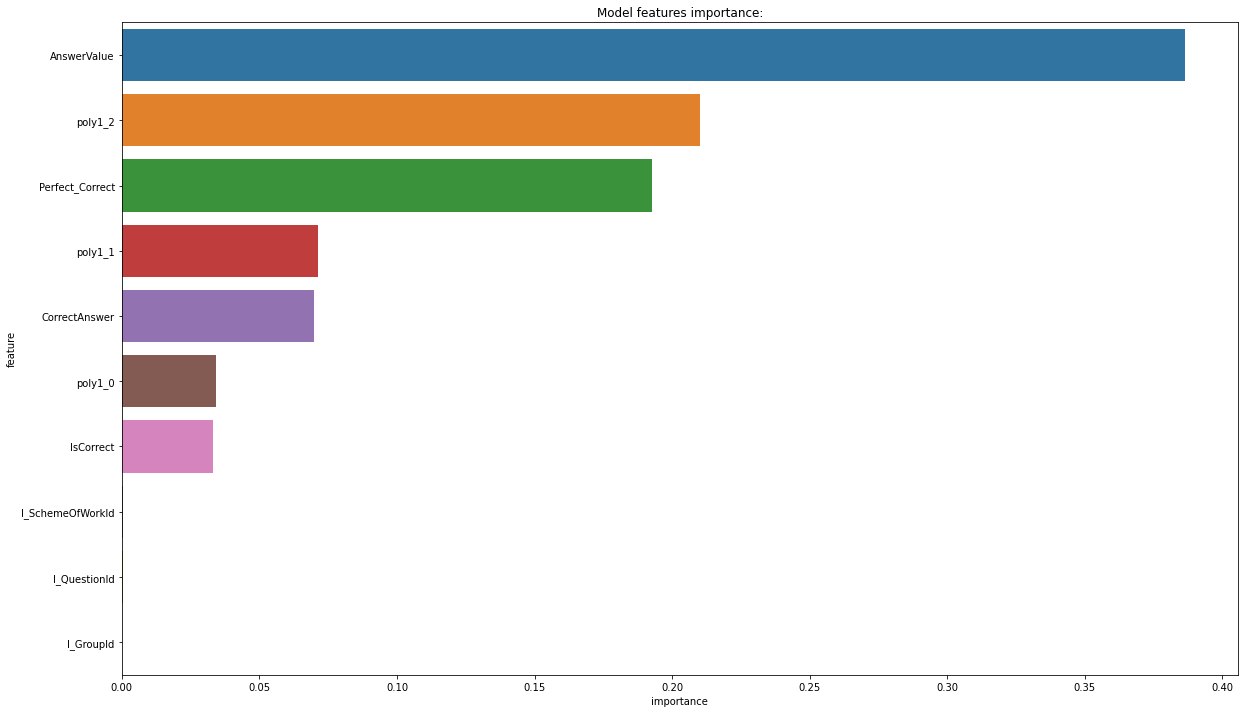

In [ ]:
feature_importance_df = pd.DataFrame(rf_clf.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = df_.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(10))
plt.title('Model features importance:')

# FEATURE SELECTION

In [ ]:
new_feat = feature_importance_df.sort_values(by = ['importance'], ascending = False).head(10)['feature'].to_list()

In [ ]:
new_feat

['AnswerValue',
 'poly1_2',
 'Perfect_Correct',
 'poly1_1',
 'CorrectAnswer',
 'poly1_0',
 'IsCorrect',
 'l_SchemeOfWorkId',
 'l_QuestionId',
 'l_GroupId']

In [ ]:
X_new = df[new_feat]

In [ ]:
X_new = X_new.drop('AnswerValue', axis = 1)

In [ ]:
X_new

,poly1_2,Perfect_Correct,poly1_1,CorrectAnswer,poly1_0,IsCorrect,l_SchemeOfWorkId,l_QuestionId,l_GroupId
1058649,0.0,1.0,1.0,1.0,0.0,0.0,9.043577,10.168080,8.776939
2900917,2.0,3.0,2.0,2.0,1.0,1.0,9.034319,8.952347,9.244065
3267372,0.0,2.0,2.0,2.0,0.0,0.0,9.043813,10.203222,9.034319
1522435,0.0,3.0,3.0,3.0,0.0,0.0,10.248070,9.654834,9.174920
1364692,0.0,2.0,2.0,2.0,0.0,0.0,9.038365,9.383705,8.812099
...,...,...,...,...,...,...,...,...,...
3054988,2.0,3.0,2.0,2.0,1.0,1.0,9.043577,9.939289,9.233275
3531913,4.0,5.0,4.0,4.0,1.0,1.0,9.037415,9.645105,9.192584
2196529,2.0,3.0,2.0,2.0,1.0,1.0,9.034319,10.092288,9.179984
1747813,0.0,2.0,2.0,2.0,0.0,0.0,9.035987,9.385805,8.827908


In [ ]:
new_f= scaler.fit_transform(X_new)
X_train, X_test, y_train, y_test = train_test_split(new_f, y, test_size=0.45, random_state = 10)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=4)
## Define the dictionary for the grid search and the model object to search on
param_grid = {'n_estimators': [51,100,200,],
          'max_features': ['auto', 'sqrt', 'log2'],
          'max_depth' : ['None',4,5,6,7,8],
          'criterion' : ['gini']}

clf = ms.GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      scoring = 'accuracy',
                      return_train_score = True)

clf.fit(new_f, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(estimator=RandomForestClassifier(n_estimators=4),
             param_grid={'criterion': ['gini'],
                         'max_depth': ['None', 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [51, 100, 200]},
             return_train_score=True, scoring='accuracy')

# Print Best Parameter

In [ ]:
print(clf.best_estimator_.n_estimators)
print(clf.best_estimator_.max_features)
print(clf.best_estimator_.max_depth)
# print(clf.best_estimator_.criterion)

100
auto
8


In [ ]:
print(clf.best_score_) # BEST SCORE

0.7207093652381118


In [ ]:
rf_clf = RandomForestClassifier(max_features = clf.best_estimator_.max_features,
                  max_depth = clf.best_estimator_.max_depth, criterion='gini',
                  class_weight='balanced') 
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8)

In [ ]:
pred =rf_clf.predict(X_test)

In [ ]:
#probabilities
probs = rf_clf.predict_proba(X_test)

In [ ]:
print_metrics_4(y_test, pred)

                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1      6710             2046              1242               736
AnswerValue 2       246            10139               831               758
AnswerValue 3       356             2143              8488               859
AnswerValue 4       364             1954              1152              6991

Accuracy        0.72
F1 Score        0.72
AUC             0.94
Macro precision 0.75
Macro recall    0.74
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   10734.00         11974.00         11846.00        10461.00
Precision   0.87          0.62            0.72        0.75
Recall      0.63          0.85            0.72        0.67
F1          0.73          0.72            0.72        0.71


In [ ]:
# plot_auc(y_test, probs)

In [ ]:
# With feature importance we are able to get a good model with an accuracy of 72%. But this isnt good enough for our predictions

# Gradient Boosting Classifier

In [ ]:
#FEATURES MOST CORRELATED WITH AnswerValue target 
new_fea = df[['poly1_1','CorrectAnswer','poly1_2','Perfect_Correct','Gender','l_QuestionId', 'YearBirth','Age_std_on_yr_mth','Age_min_on_yr_mth','l_QiuzId','Year_Month_int',
              'poly2_1','MonthAnswered','l_AnswerId','poly2_5','poly2_3']]
              
              

In [ ]:
x_new= scaler.fit_transform(new_fea)#Using highly correlated featues gooten through correlation
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 1000)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 10)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# A sample parameter

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01],
    "max_depth":[3,5],
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"]
    }
#passing the scoring function in the GridSearchCV
gb_clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring='accuracy',refit=False, n_jobs=-1)

gb_clf.fit(x_new, y)

GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01], 'loss': ['deviance'],
                         'max_depth': [3, 5]},
             refit=False, scoring='accuracy')

In [ ]:
gb_clf.best_params_ 

{'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 5}

In [ ]:
gb_clf.best_score_

0.716210811270539

In [ ]:
g_clf = GradientBoostingClassifier(**gb_clf.best_params_)
                                  # , criterion = 'mae', max_features= 'sqrt') 
g_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5)

In [ ]:
pred =g_clf.predict(X_test)

In [ ]:
#probabilities
probs = g_clf.predict_proba(X_test)

In [ ]:
def print_metrics_4(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4')
    print('AnswerValue 1    %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2]+ '             %5d' % conf[0,3])
    print('AnswerValue 2    %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2]+ '             %5d' % conf[1,3])
    print('AnswerValue 3    %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2]+ '             %5d' % conf[2,3])
    print('AnswerValue 4    %6d' % conf[3,0] + '            %5d' % conf[3,1] + '             %5d' % conf[3,2]+ '             %5d' % conf[3,3])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores, average='macro'))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,:], multi_class='ovr'))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))

    print(' ')
    print('         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4')
    print('Num case   %0.2f' % metrics[3][0] + '         %0.2f' % metrics[3][1] + '         %0.2f' % metrics[3][2]+ '        %0.2f' % metrics[3][3])
    print('Precision   %0.2f' % metrics[0][0] + '          %0.2f' % metrics[0][1] + '            %0.2f' % metrics[0][2]+ '        %0.2f' % metrics[0][3])
    print('Recall      %0.2f' % metrics[1][0] + '          %0.2f' % metrics[1][1] + '            %0.2f' % metrics[1][2]+ '        %0.2f' % metrics[1][3])
    print('F1          %0.2f' % metrics[2][0] + '          %0.2f' % metrics[2][1] + '            %0.2f' % metrics[2][2]+ '        %0.2f' % metrics[2][3])
    
print_metrics_4(y_test, pred)   


                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1      6322             2675              2001                10
AnswerValue 2        22            10309              1377                11
AnswerValue 3        56             2082              9597                 7
AnswerValue 4        50             2331              2229              5936

Accuracy        0.71
F1 Score        0.72
AUC             0.94
Macro precision 0.79
Macro recall    0.73
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   11008.00         11719.00         11742.00        10546.00
Precision   0.98          0.59            0.63        1.00
Recall      0.57          0.88            0.82        0.56
F1          0.72          0.71            0.71        0.72


In [ ]:
# Gradient boosting almost gave the same results with the decision tree and random forest. We need to look f or a model that will give us higher accuracy than the previous models

# BAGGING CLASSIFIER WITH DECISION TREEE

In [ ]:
#FEATURES MOST CORRELATED WITH AnswerValue target
new_fea = df[['poly1_1','CorrectAnswer','poly1_2','Perfect_Correct','Gender','l_QuestionId', 'YearBirth','Age_std_on_yr_mth','Age_min_on_yr_mth','l_QiuzId','Year_Month_int',
              'poly2_1','MonthAnswered','l_AnswerId','poly2_5','poly2_3']]
            
              

In [ ]:
x_new= scaler.fit_transform(new_fea)#Using highly correlated featues gooten through correlation
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 1000)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(X_train, y_train)


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1))

In [ ]:
pred =model.predict(X_test)

In [ ]:
#probabilities
probs = model.predict_proba(X_test)

In [ ]:
#printing model metrics
def print_metrics_4(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4')
    print('AnswerValue 1    %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2]+ '             %5d' % conf[0,3])
    print('AnswerValue 2    %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2]+ '             %5d' % conf[1,3])
    print('AnswerValue 3    %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2]+ '             %5d' % conf[2,3])
    print('AnswerValue 4    %6d' % conf[3,0] + '            %5d' % conf[3,1] + '             %5d' % conf[3,2]+ '             %5d' % conf[3,3])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('F1 Score        %0.2f' % sklm.f1_score(labels, scores, average='macro'))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,:], multi_class='ovr'))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))

    print(' ')
    print('         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4')
    print('Num case   %0.2f' % metrics[3][0] + '         %0.2f' % metrics[3][1] + '         %0.2f' % metrics[3][2]+ '        %0.2f' % metrics[3][3])
    print('Precision   %0.2f' % metrics[0][0] + '          %0.2f' % metrics[0][1] + '            %0.2f' % metrics[0][2]+ '        %0.2f' % metrics[0][3])
    print('Recall      %0.2f' % metrics[1][0] + '          %0.2f' % metrics[1][1] + '            %0.2f' % metrics[1][2]+ '        %0.2f' % metrics[1][3])
    print('F1          %0.2f' % metrics[2][0] + '          %0.2f' % metrics[2][1] + '            %0.2f' % metrics[2][2]+ '        %0.2f' % metrics[2][3])
    
print_metrics_4(y_test, pred)   


                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1      7950             1167              1064               774
AnswerValue 2      1215             8552              1180               866
AnswerValue 3      1158             1365              8530               757
AnswerValue 4      1091             1274              1135              6937

Accuracy        0.71
F1 Score        0.71
AUC             0.93
Macro precision 0.69
Macro recall    0.72
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   10955.00         11813.00         11810.00        10437.00
Precision   0.70          0.69            0.72        0.74
Recall      0.73          0.72            0.72        0.66
F1          0.71          0.71            0.72        0.70


In [ ]:
# This Model perform stiil gave us the same results with  the ordinary  decision tree classifierm results, there is no significant difference using bagging classifier with the decision tree classifer

# BAGGING CLASSIFIER WITH NAIVE BAYES

In [ ]:
#FEATURES MOST CORRELATED WITH AnswerValue target
new_fea = df[['poly1_1','CorrectAnswer','poly1_2','Perfect_Correct','Gender','l_QuestionId', 'YearBirth','Age_std_on_yr_mth','Age_min_on_yr_mth','l_QiuzId','Year_Month_int',
              'poly2_1','MonthAnswered','l_AnswerId','poly2_5','poly2_3']]          

In [ ]:
x_new= scaler.fit_transform(new_fea)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 1000)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model = BaggingClassifier(GaussianNB(var_smoothing=8e-9))
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(var_smoothing=8e-09))

In [ ]:
pred =model.predict(X_test)

In [ ]:
#probabilities
probs = model.predict_proba(X_test)

In [ ]:
print_metrics_4(y_test, pred)

                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1      7835             1593                15              1512
AnswerValue 2      1815             8205                29              1764
AnswerValue 3      3397                0              6671              1742
AnswerValue 4      3016             1554                23              5844

Accuracy        0.63
F1 Score        0.64
AUC             0.78
Macro precision 0.61
Macro recall    0.70
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   10955.00         11813.00         11810.00        10437.00
Precision   0.49          0.72            0.99        0.54
Recall      0.72          0.69            0.56        0.56
F1          0.58          0.71            0.72        0.55


In [ ]:
# This didnt perform like the bagging alorith with decision tree. Obviously Decision tree actually improved the performance of the bagging algorithm. However this isnt a good model considering previous algorith

# ADABOOST

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
x_new= scaler.fit_transform(new_fea)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 1000)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.45, random_state = 1000)

In [ ]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2,3,5]
             }

In [ ]:
DTC = DecisionTreeClassifier(random_state = 1000, max_features = 'auto', class_weight = 'balanced', max_depth = 15)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'accuracy')


In [ ]:
grid_search_ABC.fit(x_new, y)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                max_depth=15,
                                                                                max_features='auto',
                                                                                random_state=1000)),
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': [1, 2, 3, 5]},
             scoring='accuracy')

In [ ]:
pred =grid_search_ABC.predict(X_test)

In [ ]:
#probabilities
probs =grid_search_ABC.predict_proba(X_test)

In [ ]:
print_metrics_4(y_test, pred)

                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1      8993              791               542               629
AnswerValue 2       566             9983               587               677
AnswerValue 3       638              670              9915               587
AnswerValue 4       558              712               549              8618

Accuracy        0.83
F1 Score        0.83
AUC             0.98
Macro precision 0.83
Macro recall    0.83
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   10955.00         11813.00         11810.00        10437.00
Precision   0.84          0.82            0.86        0.82
Recall      0.82          0.85            0.84        0.83
F1          0.83          0.83            0.85        0.82


In [ ]:
# Among these classifiers, Adaboost perform very well than any of the models by doing feature selection and also doing grid search hyper parameters

# MY CHOSEN MODEL 

# KNN CLASSIFIER

In [ ]:
x_scaled= scaler.fit_transform(X)
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.45, random_state = 10)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
pred = knn.predict(X_test)

In [ ]:
#probabilities
probs =knn.predict_proba(X_test)

In [ ]:
print_metrics_4(y_test, pred)

                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1      9824             1225                32                 1
AnswerValue 2      1402             9413               878                37
AnswerValue 3       140             1694              9268               668
AnswerValue 4         2              198              1394              8839

Accuracy        0.83
F1 Score        0.83
AUC             0.96
Macro precision 0.81
Macro recall    0.84
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   11082.00         11730.00         11770.00        10433.00
Precision   0.86          0.75            0.80        0.93
Recall      0.89          0.80            0.79        0.85
F1          0.88          0.78            0.79        0.88


In [ ]:
rate_of_error= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    rate_of_error.append(np.mean(pred_i != y_test))


In [ ]:
from sklearn import neighbors


Text(0, 0.5, 'Rate of Error')

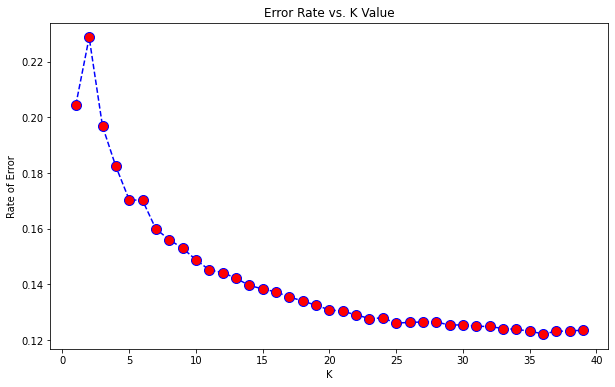

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),rate_of_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Rate of Error')

In [ ]:
# NOW WITH K=36
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)
#probabilities
probs =knn.predict_proba(X_test)

print('WITH K=36')
print('\n')
print_metrics_4(y_test,pred)
print('\n')
print(classification_report(y_test,pred))

WITH K=36


                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1     10284              797                 1                 0
AnswerValue 2       791             9955               980                 4
AnswerValue 3        16             1308              9770               676
AnswerValue 4         0               25               903              9505

Accuracy        0.88
F1 Score        0.88
AUC             0.98
Macro precision 0.88
Macro recall    0.89
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   11082.00         11730.00         11770.00        10433.00
Precision   0.93          0.82            0.84        0.93
Recall      0.93          0.85            0.83        0.91
F1          0.93          0.84            0.83        0.92


              precision    recall  f1-score   support

         1.0       0.93      0.93      0.93     11082
         2.0       0.82      0.

In [ ]:
# print_metrics_4(y_test, pred)

In [ ]:
# The choice of K has a drastic effect on the KNN classifier obtained. I considered a method of picking an optimal K value, the optimal  k valueas we can see have the  lowest error rate at K=36. Error rate seems to reach a stable minimum at K=36 and that gave us a perfect accuracy of 88%

# so after I retrain and re-evaluate our model with K=36 i obtain optimal accuracy of 88%

# ENSEMBLING TECHNIQUES

In [ ]:
x_new= scaler.fit_transform(new_fea)
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.45, random_state = 1000)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 


In [ ]:
scaler = StandardScaler()
#ann = make_pipeline(scaler, MLPClassifier(solver='lbfgs',max_iter=4))
# lr = make_pipeline(scaler, LogisticRegression())
kNN = make_pipeline(scaler, KNeighborsClassifier(n_neighbors=3))
dtree = DecisionTreeClassifier(criterion='entropy')
gnb = make_pipeline(scaler, GaussianNB())
# svc = make_pipeline(scaler, SVC())
# qda = make_pipeline(scaler, QuadraticDiscriminantAnalysis())

# format required for sklearn stacking
estimator_tups = [('kNN',kNN),('dtree', dtree),('gnb',gnb)]

In [ ]:
Ensemble = VotingClassifier(estimators=estimator_tups)

In [ ]:
for clf, label in zip([kNN, dtree,gnb], ['kNN', 'dtree', 'gnb','Ensemble']):
  scores = cross_val_score(clf, x_new, y, scoring='accuracy', cv=2)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.70 (+/- 0.00) [kNN]
Accuracy: 0.71 (+/- 0.00) [dtree]
Accuracy: 0.63 (+/- 0.00) [gnb]


In [ ]:
Ensemble.fit(x_new, y)

VotingClassifier(estimators=[('kNN',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier(n_neighbors=3))])),
                             ('dtree',
                              DecisionTreeClassifier(criterion='entropy')),
                             ('gnb',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('gaussiannb', GaussianNB())]))])

In [ ]:
preds=Ensemble.predict(X_test)

In [ ]:
# #probabilities
# probs =Ensemble.predict_proba(X_test)

In [ ]:
    print_metrics_4(y_test, preds)

                 Confusion matrix
                 AnswerValue 1   AnswerValue 2    AnswerValue 3    AnswerValue 4
AnswerValue 1     10751              204                 0                 0
AnswerValue 2       973            10840                 0                 0
AnswerValue 3      1956              204              9650                 0
AnswerValue 4      1978              211                 0              8248

Accuracy        0.88
F1 Score        0.88
AUC             0.94
Macro precision 0.82
Macro recall    0.95
 
         AnswerValue 1  AnswerValue 2  AnswerValue 3  AnswerValue 4
Num case   10955.00         11813.00         11810.00        10437.00
Precision   0.69          0.95            1.00        1.00
Recall      0.98          0.92            0.82        0.79
F1          0.81          0.93            0.90        0.88


In [ ]:
# Ensembling Method seems to perform well by reducing model possibilities of bias with an acuuracy of 88% with auc score of 0.94 

# COMPARING MODELS METRICS

           Liner SVM  RBF SVM  Poly SVM  Logistic Reg  Gaussian NB  \
Accuracy        0.75     0.70      0.68          0.56         0.64   
Precision       0.75     0.69      0.64          0.56         0.61   
Recall          0.77     0.71      0.66          0.56         0.71   
F1-Score        0.75     0.70      0.68          0.55         0.64   
ROC             0.92     0.92      0.87          0.58         0.79   

           Bernoulli NB  Decision Tree  Random Forest  Gradient Boosting  \
Accuracy           0.54           0.72           0.72               0.71   
Precision          0.74           0.81           0.75               0.79   
Recall             0.63           0.71           0.74               0.73   
F1-Score           0.51           0.72           0.72               0.72   
ROC                0.78           0.92           0.94               0.94   

           Bagging Classifier Dtree  Bagging Classifier NB  AdaBoosting  \
Accuracy                       0.71            

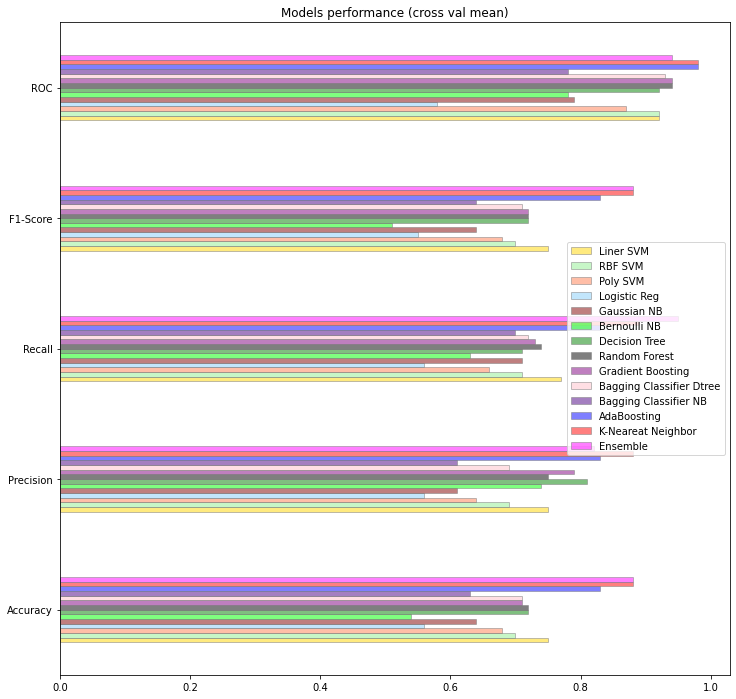

In [ ]:
models_metrics = {'Liner SVM': [0.75, 0.75, 0.77, 0.75,0.92],
                'RBF SVM': [0.70, 0.69, 0.71, 0.70,0.92],
                 'Poly SVM': [0.68, 0.64, 0.66, 0.68,0.87],
                 'Logistic Reg': [0.56, 0.56, 0.56, 0.55,0.58],
                 'Gaussian NB': [0.64, 0.61, 0.71, 0.64,0.79],
                 'Bernoulli NB': [0.54, 0.74, 0.63, 0.51,0.78],
                 'Decision Tree': [0.72, 0.81, 0.71, 0.72,0.92],
                 'Random Forest': [0.72, 0.75, 0.74, 0.72,0.94],
                 'Gradient Boosting': [0.71, 0.79, 0.73, 0.72,0.94],
                 'Bagging Classifier Dtree': [0.71, 0.69, 0.72, 0.71,0.93],
                 'Bagging Classifier NB': [0.63, 0.61, 0.70, 0.64,0.78],
                 'AdaBoosting': [0.83, 0.83, 0.83, 0.83,0.98],
                 'K-Neareat Neighbor' : [0.88, 0.88, 0.89, 0.88,0.98],
                 'Ensemble' : [0.88, 0.82, 0.95, 0.88,0.94]
                }
df = pd.DataFrame(data = models_metrics)
df.rename(index={0:'Accuracy',1:'Precision', 2: 'Recall', 3: 'F1-Score', 4: 'ROC'}, 
                 inplace=True)
print(df)
df.plot(kind='barh', figsize = (12,12), ylim = (0.94, 1), 
        color = ['gold', 'lightgreen', 'coral', 'lightskyblue','maroon','lime', 'green','black','purple','pink','indigo','blue','red','magenta'],
        rot = 0, title ='Models performance (cross val mean)',
        edgecolor = 'grey', alpha = 0.5)
#for p in ax.patches:
    #ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.0005))
plt.show()

*italicized text*

So In terms of Accuracy and other metrics performances, ENSEMBLE METHOD  Perform greatly well than any other modelwith an accuracy of 88% though KNN was able to classify accurately as Ensemble method with  same accuracy but different AUC. Then ADABOOSTING classifiernbehave perfectly well with an accuracy of 83%.

Therefore either Ensemble methode classifier and KNN will give us best predictions for our AnswerValue. 

# Best Model
Two Model gave the best Model: which are
a.ENSEMBLE METHOD
b. KNN CLASSIFIER 

Ensembling Techniques gave the best Results:
Three differents classifier was passed as an estimators into the ensemble method. The three estimator used are;
Before  i achived these 3 best estimators, i have used different numbers of estimators such as logisticRegression, svm, Adaboost, gradient Boosting but yest they were notgiving an optimum accuracy suitable for me.

After so much tunning and i was able to get the 3 best estimators that gave the best accuracy. These 3 estimators are;
1. KNN with a n_neighbors parameter of 3
2. Decision tree with a criterion parameterof entropy
3. Naives Bayes

After thatm i performed cross validation on the 3 estimators thereby helping my model to behave very. This cross validation behave well with CV of 2 .

The type of ensemble technique used was VotingClassifier. These estimator was then passed into VotingClassifier.

Then the VotingClassifier helped to get an accurcy of 88% which was far better than every other classifier asides KNN and far better than KNN because it takes a lesser time to learn as compared to KNN

2. KNN
KNN gave a good result f 88% accuracy_score
KNN has n_neighbors parameters that can be tuned to get the best results. I initially started with n_neighbiors of 5 which gave a very good performance of 83% accuracy_score
Then i have to plot the error rate so as to minimize the error rate using different values of n_neighbors parameter ranges frm 1-40.
During this process of iteration and learning at different n_neighbors. The error was very mininimized at n_neighbors of k = 36.
Then using K of 36 gave us the best accuracy of 88%





Architecture OF KNN MODEL

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems. Reasons it is most suitbale for out AnswerValue Task
K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.
Example: in our task 2, we have an AnswerValue similar t a multi class of 4 classes 1,2,3,4, and we want to know either the AnswerValue Selected by the student is 1,2,3,4. So for this identification, we can use the KNN algorithm, as it works on a similarity measure. Our KNN model will find the similar features of the new data set to either the 1,2,3,4 values and based on the most similar features it will put it in either 1,2,3,4 category.

HOW KNN WORKS.

The K-NN working can be explained on the basis of the below algorithm:
Step-1: Select the number K of the neighbors
Step-2: Calculate the Euclidean distance of K number of neighbors
Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.
Step-4: Among these k neighbors, count the number of the data points in each category.
Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.
Step-6: Our model is ready

e.g 
Suppose we have a new data point from a students and we need to put it in the required category.
Firstly, we will choose the number of neighbors, which i chose the k=5.
Next, I calculated the Euclidean distance between the data points. The Euclidean distance is the distance between two points.
By calculating the Euclidean distance we got the nearest neighbors, i.e certain nearest neighbors in category 1,certain nearest neighbors in category 2,certain nearest neighbors in category 3 and certain nearest neighbors in category 4. 

so the new data point must belong to either of the 4 categories.

SELECTING BEST VALUYE OF K
There is no particular way to determine the best value for "K", so we need to try some values to find the best out of them. The most preferred value for K is 5 and that was what gave me 83% at first. before trying different value of K.
A very low value for K such as K=1 or K=2, can be noisy and lead to the effects of outliers in the model.
Large values for K are good, but it may find some difficulties. But in my model K value of 36 gave me thje best accuracy which in turne improve my ,model performances.

Advantages of KNN Algorithm:
It is simple to implement.
It is robust to the noisy training data
It can be more effective if the training data is large.
Disadvantages of KNN Algorithm:
Always needs to determine the value of K which may be complex some time.
The computation cost is high because of calculating the distance between the data points for all the training samples.

